  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


C:\Users\Matias Davila\AppData\Local\Temp\ipykernel_13812\492149074.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)
c:\Users\Matias Davila\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Matias Davila\AppData\Local\Temp\ipykernel_13812\492149074.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)
c:\Users\Matias Davila\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.P


Reglas para France:
                                          antecedents  \
90  (SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...   
91  (SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...   
59                    (SET/6 RED SPOTTY PAPER PLATES)   
85           (POSTAGE, SET/6 RED SPOTTY PAPER PLATES)   
53                          (TEA PARTY BIRTHDAY CARD)   
50                (STRAWBERRY LUNCH BOX WITH CUTLERY)   
40              (ROUND SNACK BOXES SET OF4 WOODLAND )   
4                         (ALARM CLOCK BAKELIKE RED )   
30                               (RABBIT NIGHT LIGHT)   
58                      (SET/6 RED SPOTTY PAPER CUPS)   

                        consequents  antecedent support  consequent support  \
90  (SET/6 RED SPOTTY PAPER PLATES)            0.087336            0.109170   
91    (SET/6 RED SPOTTY PAPER CUPS)            0.087336            0.117904   
59    (SET/6 RED SPOTTY PAPER CUPS)            0.109170            0.117904   
85    (SET/6 RED SPOTTY PAPER CUPS)

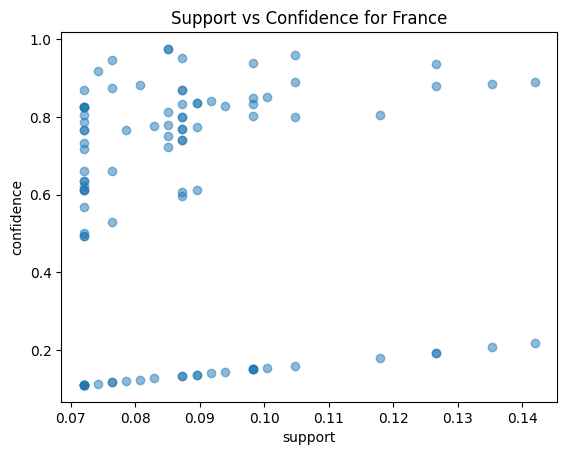


Reglas para Germany:
                                          antecedents  \
8                (ROUND SNACK BOXES SET OF 4 FRUITS )   
16  (ROUND SNACK BOXES SET OF 4 FRUITS , ROUND SNA...   
3                          (PLASTERS IN TIN SPACEBOY)   
10              (ROUND SNACK BOXES SET OF4 WOODLAND )   
12                           (WOODLAND CHARLOTTE BAG)   
6                          (REGENCY CAKESTAND 3 TIER)   
1                    (PLASTERS IN TIN CIRCUS PARADE )   
4                  (PLASTERS IN TIN WOODLAND ANIMALS)   
14               (ROUND SNACK BOXES SET OF 4 FRUITS )   
18      (ROUND SNACK BOXES SET OF 4 FRUITS , POSTAGE)   

                              consequents  antecedent support  \
8                               (POSTAGE)            0.119403   
16                              (POSTAGE)            0.099502   
3                               (POSTAGE)            0.081260   
10                              (POSTAGE)            0.185738   
12                       

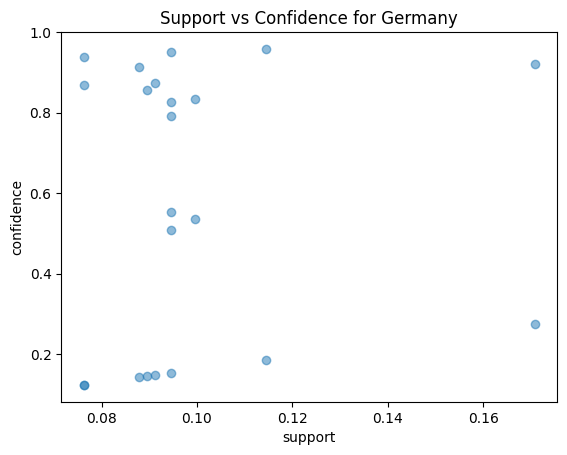


Reglas para Spain:
                                          antecedents  \
8                   (PACK OF 72 RETROSPOT CAKE CASES)   
18  (6 RIBBONS RUSTIC CHARM, ASSORTED COLOUR BIRD ...   
4                     (ASSORTED COLOUR BIRD ORNAMENT)   
6               (CLASSIC METAL BIRDCAGE PLANT HOLDER)   
16              (SET/20 RED RETROSPOT PAPER NAPKINS )   
2                            (6 RIBBONS RUSTIC CHARM)   
20           (ASSORTED COLOUR BIRD ORNAMENT, POSTAGE)   
10                           (PLASTERS IN TIN SKULLS)   
14               (SET OF 72 RETROSPOT PAPER  DOILIES)   
12                         (REGENCY CAKESTAND 3 TIER)   

                 consequents  antecedent support  consequent support  \
8                  (POSTAGE)            0.104762            0.590476   
18                 (POSTAGE)            0.085714            0.590476   
4                  (POSTAGE)            0.114286            0.590476   
6                  (POSTAGE)            0.095238            0.59

c:\Users\Matias Davila\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


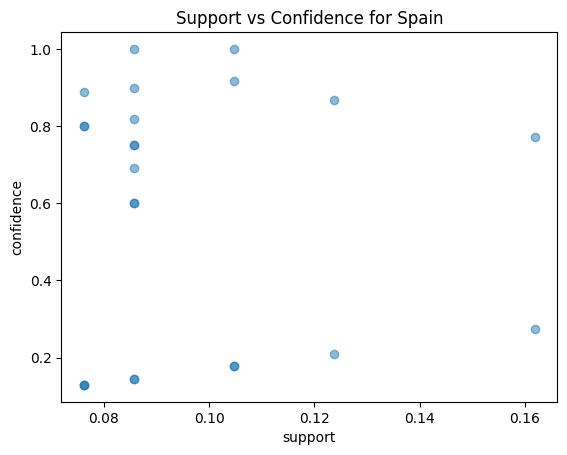

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

ruta = r'C:\Users\Matias Davila\OneDrive - DISTRIBUIDORA Y COMERCIALIZADORA OPEN\Documentos\Matias\Online Retail.xlsx'
df = pd.read_excel(ruta)
print(df.head())

# Eliminar filas con valores nulos
df.dropna(inplace=True)

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

# Implementación del modelo Apriori para varios países
countries = ['France', 'Germany', 'Spain']
rules_by_country = {}

for country in countries:
    # Filtrar las transacciones por país
    df_country = df[df['Country'] == country]
    
    # Convertir los datos en una matriz binaria
    basket = (df_country.groupby(['InvoiceNo', 'Description'])['Quantity']
              .sum().unstack().reset_index().fillna(0)
              .set_index('InvoiceNo'))
    
    basket_sets = basket.applymap(encode_units)
    
    # Encontrar conjuntos de ítems frecuentes
    frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
    
    # Encontrar reglas de asociación
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    
    rules_by_country[country] = rules

# Análisis de reglas por país
for country, rules in rules_by_country.items():
    print(f"\nReglas para {country}:")
    rules_sorted = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
    print(rules_sorted.head(10))
    print("\n")
    # Estadísticas descriptivas
    print(rules.describe())
    print("\n")
    # Visualizar las reglas usando un gráfico de dispersión
    plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(f'Support vs Confidence for {country}')
    plt.show()
